In [16]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv("../data/PakwheelsEDA.csv")

In [3]:
df=df.drop(columns=['Unnamed: 0'])

In [4]:
df.dtypes

Engine            int64
CC                int64
Transmission      int64
mileage           int64
year              int64
prices          float64
mapCity           int64
dtype: object

In [5]:
#y=independent Varibales
#x=dependent variables

In [6]:
y=df[['Engine','CC','Transmission','mileage','year','mapCity']].values

In [7]:
x=df['prices'].values
x

array([32.5 , 42.5 , 39.75, ..., 24.75, 36.  , 25.  ])

In [8]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [9]:
print(len(xTrain))
print(len(yTrain))
print(len(xTest))
print(len(yTest))

3231
3231
808
808


# Random Forest Regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(yTrain,xTrain.reshape(-1,1) )
def RandomForestaccuracy(y):
    p=regr.predict([y])
    return p

print()
print()

RFPredicted=[]
RFTrue=[]
for i in range(len(yTest)):
    RFPredicted.append(RandomForestaccuracy(yTest[i]))
    RFTrue.append(xTest[i])

x=[]
for i in range (len(RFPredicted)):
    x.append((RFTrue[i]-RFPredicted[i])**2)
MeanSquareError=(sum(x)/len(x))
print("Mean Square Error",MeanSquareError,"%")

print("Root Mean Square Error",math.sqrt(MeanSquareError),"%")

from joblib import dump, load
dump(regr, './RandomForest.joblib') 


C:\Users\Abubakar\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.




Mean Square Error [11.08283746] %
Root Mean Square Error 3.3290895842826336 %


['./RandomForest.joblib']

#     Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(yTrain,xTrain.reshape(-1,1))
reg.score(yTrain,xTrain.reshape(-1,1))
reg.coef_
reg.intercept_
reg.predict([[5,1800,0,42000,2018,2]])
def accuracy(y):
    p=reg.predict([y])
    return p

print()
print()

LRPredicted=[]
LRTrue=[]
for i in range(len(yTest)):
    LRPredicted.append(accuracy(yTest[i]))
    LRTrue.append(xTest[i])

x=[]
for i in range (len(LRPredicted)):
    x.append((LRTrue[i]-LRPredicted[i])**2)
MeanSquareError=(sum(x)/len(x))

print("Mean Square Error",MeanSquareError,"%")

print("Root Mean Square Error",math.sqrt(MeanSquareError),"%")

from joblib import dump, load
dump(reg, './LinearRegression.joblib') 




Mean Square Error [[14.53640369]] %
Root Mean Square Error 3.8126635950365753 %


['./LinearRegression.joblib']

# KNeighborsRegressor

In [34]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(yTrain,xTrain.reshape(-1,1))

print(neigh.predict([[5,1800,0,42000,2018,2]]))
reg.predict([[5,1800,0,42000,2018,2]])
def KNNaccuracy(y):
    p=neigh.predict([y])
    return p

print()
print()

KNNPredicted=[]
KNNTrue=[]
for i in range(len(yTest)):
    KNNPredicted.append(KNNaccuracy(yTest[i]))
    KNNTrue.append(xTest[i])

x=[]
for i in range (len(KNNPredicted)):
    x.append((KNNTrue[i]-KNNPredicted[i])**2)
MeanSquareError=(sum(x)/len(x))
print("Mean Square Error",MeanSquareError)
print("Root Mean Squared Error",math.sqrt(MeanSquareError))

from joblib import dump, load
dump(neigh, './KNNRegression.joblib') 


[[37.15]]


Mean Square Error [[32.75912024]]
Root Mean Squared Error 5.723558354306217


['./KNNRegression.joblib']

# Lasso Regression

In [33]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(yTrain,xTrain.reshape(-1,1))
clf.predict([[5,1800,0,42000,2018,2]])
def lassoaccuracy(y):
    p=clf.predict([y])
    return p

print()
print()

clfPredicted=[]
clfTrue=[]
for i in range(len(yTest)):
    clfPredicted.append(lassoaccuracy(yTest[i]))
    clfTrue.append(xTest[i])

x=[]
for i in range (len(clfPredicted)):
    x.append((clfTrue[i]-clfPredicted[i])**2)
MeanSquareError=(sum(x)/len(x))
print("Mean Square Error",MeanSquareError)
print("Root Mean Squared Error",math.sqrt(MeanSquareError))

from joblib import dump, load
dump(clf, './LassoRegression.joblib') 




Mean Square Error [14.54916278]
Root Mean Squared Error 3.8143364802092923


['./LassoRegression.joblib']

# Testing Pickled Models

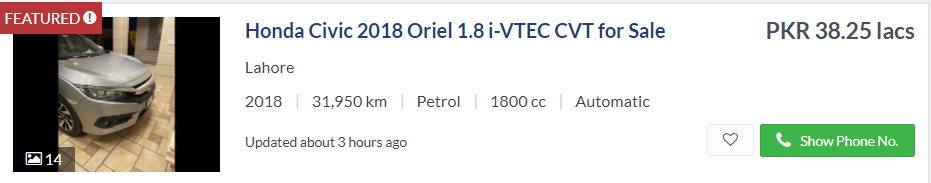

In [77]:
from IPython.display import Image
PATH = "civic.png"
Image(filename = PATH, width=1000, height=100)
# below is the random ad we took from pakwheels which being uploaded 33 minutes ago
#Engine => 5  = Petrol
#CC =>1800
#Transmission => 0 = Automatic
#Mileage 31950 
#Year = 2018
#City => 1 = Lahore
#so the final input array would be like [[5,1800,0,31950,2018,1]]

In [88]:
Input=[[5,1800,0,31950,2018,1]]
#Random Fores Prediction
RandomF=load('RandomForest.joblib')
print("Random Forest Prediction : ",RandomF.predict(Input))

#KnnRegressor Prediction
knn=load('KNNRegression.joblib')
print("Knn Regression Prediction : ",knn.predict(Input))

#Lasso Regression
Lasso=load('LassoRegression.joblib')
print("Lasso Regression Prediction : ",Lasso.predict(Input))

#Linear Regression
Linear=load('LinearRegression.joblib')
print("Linear Regerssion Prediction : ",Linear.predict(Input))

Random Forest Prediction :  [38.85213007]
Knn Regression Prediction :  [[38.25]]
Lasso Regression Prediction :  [35.3139501]
Linear Regerssion Prediction :  [[35.32317196]]
